<a href="https://colab.research.google.com/github/MykolaKud/python_for_ds_tasks/blob/main/chicago_taxi_project_by_Mykola_Kudinov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датасет **Chicago Taxi Trips** містить в собі дані про більшість поїздок на таксі усіх служб у період з 2013 року. Для аналізу мною було обрано вибірку за 2021 рік служби таксі під назвою **Blue Ribbon Taxi Association Inc.** Дані взяті з відкритого джерела в Google Big Query.

Короткий опис вибірки

Кожен рядок це унікальний ідентифікаційний номер поїздки. Для аналізу я обрав 13 стовпчиків:
1. unique_key - Унікальний ідентифікатор поїздки.
2. trip_start_timestamp - коли поїздка почалася, округлено до найближчих 15 хвилин.
3. trip_end_timestamp - коли поїздка закінчилася, округлено до найближчих 15 хвилин.
4. trip_seconds - час поїздки у секундах
5. trip_miles - довжина поїздки у милях
6. fare - вартість поїздки
7. tips - чайові, які залишив клієнт
8. tolls - дорожні збори
9. extras - екстра доплати за поїздку
10. trip_total - загальна сума за поїздку, яку сплатив пасажир
11. payment_type - тип оплати за поїздку (може бути невідома)
12. pickup_community_area - локація підбору пасажира (може бути не вказана з міркувань конфіденційності)
13. dropoff_community_area - локація висадки пасажира (може бути не вказана з міркувань конфіденційності)

In [45]:
!pip install google-cloud-bigquery pandas

In [46]:
from google.cloud import bigquery
from google.colab import files

# Завантаження ключа JSON
uploaded = files.upload()

Saving steadfast-icon-444914-t8-12283520df80.json to steadfast-icon-444914-t8-12283520df80.json


In [47]:
# Встановлення шляху до ключа
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "steadfast-icon-444914-t8-12283520df80.json"

#Встановлюємо клієнт для роботи з BigQuery
client = bigquery.Client()

In [48]:
#SQL-запит з BigQuery
query = """
        SELECT
          unique_key,
          trip_start_timestamp,
          trip_end_timestamp,
          trip_seconds,
          trip_miles,
          fare,
          tips,
          tolls,
          extras,
          trip_total,
          payment_type,
          pickup_community_area,
          dropoff_community_area
       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
       WHERE (
         company = 'Blue Ribbon Taxi Association Inc.'
         AND EXTRACT(YEAR FROM trip_start_timestamp) = 2021
             )
"""

# Виконання запиту та збереження у DataFrame
df = client.query(query).to_dataframe()


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [50]:
# вимкнення повідомлень про попередження
warnings.filterwarnings("ignore")

# **0.Очистка даних**

In [51]:
# Переглянемо загальний вигляд таблиці.
df.head()

,unique_key,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,payment_type,pickup_community_area,dropoff_community_area
0,8b92190ee2ac4407f8846acf6c6bb7579b8d19fe,2021-11-21 15:45:00+00:00,2021-11-21 17:00:00+00:00,3900,2.2,27.75,0.0,0.0,0.0,27.75,Cash,<NA>,<NA>
1,b822f92cd0ee3d3bb2fa106e21e1864dd1b575a0,2021-07-29 21:00:00+00:00,2021-07-29 21:30:00+00:00,1860,0.9,38.00,8.5,0.0,4.0,50.50,Credit Card,<NA>,<NA>
2,8c43e8c05623c755b31e19950f2dee7d0cc7c01b,2021-11-13 22:15:00+00:00,2021-11-13 22:30:00+00:00,1500,0.0,32.25,0.0,0.0,0.0,32.25,Cash,<NA>,<NA>
3,8e50b2a1e812c6e587402669b259fb5c287adc42,2021-11-22 12:45:00+00:00,2021-11-22 12:45:00+00:00,0,0.0,3.25,0.0,0.0,0.0,3.25,Cash,<NA>,<NA>
4,adf462855c6522fa2705470e691fcc2ffcf7caa6,2021-08-31 14:15:00+00:00,2021-08-31 14:30:00+00:00,60,1.2,4.00,0.0,0.0,0.0,4.00,Cash,<NA>,<NA>


In [52]:
#Переглянемо типи даних у стовпчиках.
df.dtypes

,0
unique_key,object
trip_start_timestamp,"datetime64[us, UTC]"
trip_end_timestamp,"datetime64[us, UTC]"
trip_seconds,Int64
trip_miles,float64
fare,float64
tips,float64
tolls,float64
extras,float64
trip_total,float64


In [53]:
# Перевіряємо на наявність дублікатів в колонці з унікальними значеннями

if df['unique_key'].duplicated().any():
  print("В стовпчику unique_key присутні дублікати. Для подальшої роботи з даними треба їх позбутися")
else:
  print("Дублікати в відсутні. Всі значення в стовпчику unique_key є унікальними.")

Дублікати в відсутні. Всі значення в стовпчику unique_key є унікальними.


In [54]:
# Перевіряємо наявність null-значень

df.isnull().sum()

,0
unique_key,0
trip_start_timestamp,0
trip_end_timestamp,24
trip_seconds,27
trip_miles,6
fare,3
tips,3
tolls,3
extras,3
trip_total,3


In [55]:
# Прибираємо null-значення з усіх стовпчиків, крім pickup_community_area та dropoff_community_area.
#Пусті значення в цих стовпчиках можуть означати, що дані про місце висадки і посадки приховано, але це не заважає нам аналізувати інші показники по цій поїздці.

df = df.dropna(subset=['trip_end_timestamp', 'trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras', 'trip_total'])

In [56]:
#Перевіряємо чи залишилися null-значення

df.isnull().sum()

,0
unique_key,0
trip_start_timestamp,0
trip_end_timestamp,0
trip_seconds,0
trip_miles,0
fare,0
tips,0
tolls,0
extras,0
trip_total,0


In [57]:
# Подивимося основні числові характеристики числових стовпців

df.describe()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_community_area,dropoff_community_area
count,119137.0,119137.000000,119137.000000,119137.000000,119137.0,119137.000000,119137.000000,111464.0,106401.0
mean,938.99796,3.432607,17.005040,1.703248,0.0,1.496441,20.204729,30.830699,24.788179
std,1022.927095,5.531045,24.350506,3.566808,0.0,5.293760,27.159240,24.091136,20.107676
min,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1.0
25%,300.0,0.000000,6.000000,0.000000,0.0,0.000000,7.000000,8.0,8.0
50%,660.0,1.000000,9.500000,0.000000,0.0,0.000000,11.750000,28.0,24.0
75%,1320.0,4.000000,26.500000,2.000000,0.0,1.000000,28.500000,34.0,32.0
max,62280.0,293.900000,4500.060000,350.000000,0.0,479.010000,4500.060000,77.0,77.0


In [58]:
has_zeros_miles =  (df["trip_miles"] == 0).sum()
has_zeros_sec = (df["trip_seconds"] == 0).sum()

In [59]:
# Перевіримо, скільки нульових значень у стовпцях з довжиною поїздки і тривалістю поїздки

if has_zeros_miles > 0 and has_zeros_sec > 0:
    print(f"У стовпцях trip_miles є {has_zeros_miles} та trip_seconds є {has_zeros_sec} значень, що дорівнюють 0.")
elif has_zeros_miles > 0:
    print(f"У стовпці trip_miles є {has_zeros_miles} значень, що дорівнюють 0.")
elif has_zeros_sec > 0:
    print(f"У стовпці trip_seconds є {has_zeros_sec} значень, що дорівнюють 0.")
else:
    print("У стовпцях trip_miles та trip_seconds немає значень, що дорівнюють 0.")

У стовпцях trip_miles є 34367 та trip_seconds є 10707 значень, що дорівнюють 0.


Висновок: у нас є поїздки з нульовим кілометражем або часом. Такі поїздки не потрібні нам для аналізу, оскільки фактично поїздки не є такими, що відбулися.

In [60]:
# Прибираємо нульові значення по довжині поїздки і тривалості поїздки

df =  df.drop(df[df['trip_miles'] == 0.0].index)
df =  df.drop(df[df['trip_seconds'] == 0.0].index)

In [61]:
# Перевіряємо чи все видалилося

check_seconds_zero = (df['trip_seconds'] == 0).sum()
check_miles_zero = (df['trip_miles'] == 0).sum()
print(check_seconds_zero, check_miles_zero)

0 0


In [62]:
#Конвертуємо стовчики з датою у формат datetime і перевіряємо результат

columns_to_convert = ['trip_start_timestamp', 'trip_end_timestamp']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_datetime)

df.dtypes

,0
unique_key,object
trip_start_timestamp,"datetime64[us, UTC]"
trip_end_timestamp,"datetime64[us, UTC]"
trip_seconds,Int64
trip_miles,float64
fare,float64
tips,float64
tolls,float64
extras,float64
trip_total,float64


In [63]:
# Перевіряємо наявність негативної різниці між початком і кінцем поїздки

df['date_difference'] = df['trip_end_timestamp'] - df['trip_start_timestamp']
df['DateDifferenceInHours'] = df['date_difference'].dt.total_seconds() / 3600
if(df['DateDifferenceInHours'] < 0).any():
  print('Є негативні значення')
else:
  print('Немає некоректних даних')

Немає некоректних даних


In [64]:
# Перевіримо колонку trip_total на коректність.
# Загальна сума поїздки має дорівнювати сумі тарифу, чайових, дорожних зборів та екстра доплат

# Для початку створимо окремий стовпчик з сумою всіх тарифів

df['calculated_total'] = df['fare'] + df['tips'] + df['tolls'] + df['extras']


In [65]:
# Заокруглюємо цифри до 2 знаків після коми (центів) для коректної перевірки

df[['calculated_total', 'trip_total']] = df[['calculated_total', 'trip_total']].round(2)

In [66]:
# Перевірка на розбіжність між calculated_total і trip_total

df['error'] = df.apply(lambda row: 'Помилковий розрахунок' if row['calculated_total'] != row['trip_total'] else '', axis=1)

# Підрахунок кількості помилок

error_count = df['error'].value_counts().get('Помилковий розрахунок', 0)
print(f"Кількість помилок: {error_count}")

Кількість помилок: 0


# **1. Які самі завантажені години/дні/місяці в роботі таксі?**

In [67]:
# Створимо функцію для групування даних за одиницею часу
def group_by_time_unit(df, date_col, values_col, time_unit, agr_function):

    """

    Згуповує задані дані за певною одиницею часу із використанням заданої агрегаційної функції.

    Параметри:
    - df (DataFrame): Датафрейм із даними.
    - time_col (str): Назва колонки з датою.
    - values_col (str): Назва колонки, з якої підраховуються значення.
    - time_unit (str): Одиниця часу для групування ('hour', 'dayofweek', 'month', тощо).
    - agr_function (str): Агрегаційна функція, яка застосовується ('sum', 'nunique', 'mean' тощо).

    """
    df[date_col] = pd.to_datetime(df[date_col])

    if time_unit == 'hour':
      df['time_unit'] = df[date_col].dt.hour
      sort_order = None
    elif time_unit == 'date':
      df['time_unit'] = df[date_col].dt.date
      sort_order = None
    elif time_unit == 'week':
      df['time_unit'] = df[date_col].dt.isocalendar().week
      sort_order = None
    elif time_unit == 'dayofweek':
      df['time_unit'] = df[date_col].dt.day_name()
      sort_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    elif time_unit == 'month':
      df['time_unit'] = df[date_col].dt.month_name()
      sort_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    else:
      raise ValueError("Некоректна одиниця часу")

    # Групування даних і агрегація
    result_df = df.groupby('time_unit')[values_col].agg(agr_function).reset_index()

    # Перейменування колонок
    result_df.columns = [time_unit, values_col]

    # Сортування, якщо заданий порядок
    if sort_order:
        result_df[time_unit] = pd.Categorical(result_df[time_unit], categories=sort_order, ordered=True)
        result_df = result_df.sort_values(by=time_unit)
    return result_df


In [68]:
# Згрупуємо дані по годинах
grouped_by_hours_unique = group_by_time_unit(df, 'trip_start_timestamp', 'unique_key', 'hour', 'nunique')

# Згрупуємо дані по днях тижня
grouped_by_dayofweek_unique = group_by_time_unit(df, 'trip_start_timestamp', 'unique_key', 'dayofweek', 'nunique')

# Згрупуємо дані по місяцях
grouped_by_month_unique = group_by_time_unit(df, 'trip_start_timestamp', 'unique_key', 'month', 'nunique')

Побудуємо візуалізацію у вигляді стовпчатого графіку barplot для наглядності:

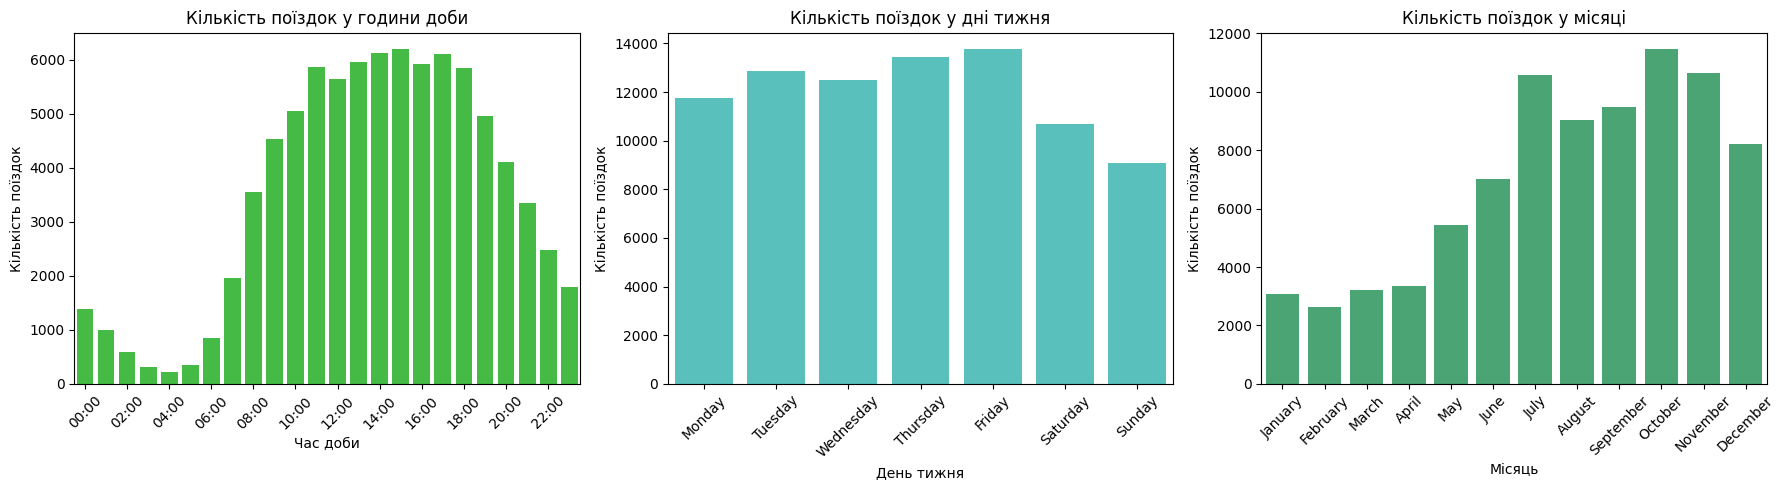

In [69]:
# Створюємо 1 рядок і 3 стовпці графіків
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Barplot для годин
sns.barplot(x='hour', y='unique_key', data=grouped_by_hours_unique, ax=axes[0], color='limegreen')
axes[0].set_title('Кількість поїздок у години доби')
axes[0].set_xlabel('Час доби')
axes[0].set_ylabel('Кількість поїздок')
axes[0].set_xticks(range(0, 24, 2))
axes[0].set_xticklabels([f"{x:02d}:00" for x in range(0, 24, 2)], rotation=45)

# Barplot для днів тижня
sns.barplot(x='dayofweek', y='unique_key', data=grouped_by_dayofweek_unique, ax=axes[1], color='mediumturquoise')
axes[1].set_title('Кількість поїздок у дні тижня')
axes[1].set_xlabel('День тижня')
axes[1].set_ylabel('Кількість поїздок')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Barplot для місяців
sns.barplot(x='month', y='unique_key', data=grouped_by_month_unique, ax=axes[2], color='mediumseagreen')
axes[2].set_title('Кількість поїздок у місяці')
axes[2].set_xlabel('Місяць')
axes[2].set_ylabel('Кількість поїздок')
axes[2].set_xticks(range(12))
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show();

**Висновок: Найбільша завантаженість роботою відбувається з 08:00 до 20:00 і в робочі дні. В розрізі місяців найбільша кількість була у липні, жовтні і листопаді, в цілому з травня по грудень відбулося суттєбо більше поїздок, ніж в перші 4 місяці 2021 року.**

# **2. Яка середня вартість поїздки і як вона змінювалася протягом року?**

Розрахуємо середню вартість поїздки:

In [70]:
#Середня вартість поїздки (округлена до центів)
average_fare_year = df['fare'].mean()
print(f'Середня вартість поїздки протягом року складала {average_fare_year:.2f}$')

Середня вартість поїздки протягом року складала 19.49$


Визначимо як змінювалася середня вартість поїздки протягом року

In [71]:
#Згрупуємо дані по днях в році і виведемо середнє
grouped_by_month_mean = group_by_time_unit(df, 'trip_start_timestamp', 'fare', 'month', 'mean')
grouped_by_month_mean

,month,fare
4,January,19.994370
3,February,17.840715
7,March,17.637416
0,April,17.234215
8,May,17.334506
6,June,18.145890
5,July,19.266384
1,August,20.670505
11,September,20.904577
10,October,20.637447


Для більш зрозумілого представлення динаміки-зобразимо її на лінійному графіку

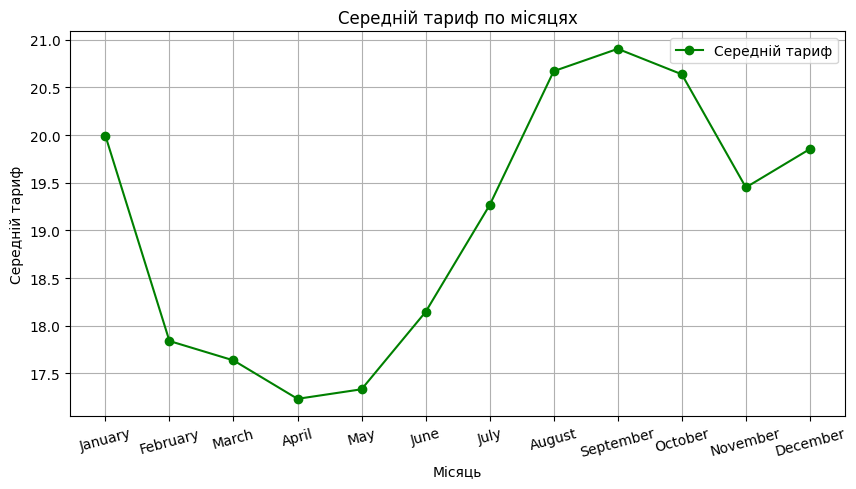

In [72]:
plt.figure(figsize=(10, 5))

# Побудова графіка з точками
plt.plot('month', 'fare', data=grouped_by_month_mean, marker='o', linestyle='-', color='g', label='Середній тариф')

# Налаштування осей і заголовків
plt.xticks(rotation=15)
plt.xlabel('Місяць')
plt.ylabel('Середній тариф')
plt.title('Середній тариф по місяцях')
plt.legend()
plt.grid(True)

plt.show();

**Висновок: Середній тариф протягом 2021 року зростав з травня по вересень, що візуально співпадає зі зростанням кількості поїздок в розрізі місяців в 2021 році. Враховуючи що середній тариф за весь рік складав 19,49$ то більшість поїздок з липня по листопад були дорожче середнього тарифу.**

# **3. Виходячи з отриманих вище даних, проаналізуємо скільки коштів було отримано по кожному місяцю і додамо середнє надходження по кожному місяцю. А також переглянемо надходження згідно кожного типу оплати.**

In [73]:
# Обчислюємо доходи за місяцями
grouped_by_month_sum = group_by_time_unit(df, 'trip_end_timestamp', 'trip_total', 'month', 'sum')

# Обчислюємо доходи по датах
grouped_by_date_sum = group_by_time_unit(df, 'trip_end_timestamp', 'trip_total', 'date', 'sum')
grouped_by_date_sum['date'] = pd.to_datetime(grouped_by_date_sum['date'])

grouped_by_date_sum['month'] = grouped_by_date_sum['date'].dt.month_name()
grouped_mean = grouped_by_date_sum.groupby('month')['trip_total'].mean().reset_index()

# Об'єднуємо дані по місячних і денних доходах
revenue_total_average_monthly = pd.merge(
    grouped_by_month_sum, grouped_mean, on='month', how='left'
)

# Перейменовуємо стовпці для зручності
revenue_total_average_monthly.columns = ['Month', 'Total_revenue', 'Average_day_revenue']

# Стилізуємо таблицю з форматуванням та градієнтом
styled_table = revenue_total_average_monthly.style.format({
    'Total_revenue': '{:.2f}',
    'Average_day_revenue': '{:.2f}'
}).background_gradient(axis=0, cmap='BuGn')

# Виводимо стилізовану таблицю
display(styled_table)

,Month,Total_revenue,Average_day_revenue
0,January,66156.37,2067.39
1,February,51647.32,1844.55
2,March,63258.11,2040.58
3,April,64835.15,2161.17
4,May,109011.25,3516.49
5,June,147908.70,4930.29
6,July,243833.56,7865.60
7,August,227031.13,7323.58
8,September,238011.41,7933.71
9,October,286040.31,9227.11


**Висновок: Як ми можемо бачити з таблиці вище, топ надходження були з липня по листопад, що співпадає з нашим висновком в попередньому запитанні.**

Також порахуємо які надходження були кожного місяця по всіх типах оплати:

In [74]:
# Підтягуємо назви місяців згідно дати
df['month'] = df['trip_end_timestamp'].dt.month_name()

# Порахуємо доходи по місяцях та типах оплати
revenue_per_month_payment_type = df.groupby(['month', 'payment_type'])['trip_total'].sum().reset_index()

# Перетворюємо дані у зведену таблицю, заповнюючи пропущені значення нулями
pivot = revenue_per_month_payment_type.pivot(
    index='month', columns='payment_type', values='trip_total'
).fillna(0)

# Стилізуємо таблицю з форматуванням та градієнтом
display(pivot.style.format("{:,.2f}").background_gradient(axis=0, cmap='Greens'))

payment_type,Cash,Credit Card,Dispute,No Charge,Unknown
month,,,,,
April,"20,562.54","24,442.86",0.00,0.00,"19,829.75"
August,"65,254.10","131,825.20",56.00,50.75,"29,845.08"
December,"52,805.18","91,879.70",75.00,36.25,"45,297.99"
February,"14,843.35","14,673.72",0.00,0.00,"22,130.25"
January,"15,799.26","13,569.00",0.00,0.00,"36,788.11"
July,"73,063.47","135,770.92",227.00,59.75,"34,712.42"
June,"46,282.75","69,992.90",11.25,0.00,"31,621.80"
March,"18,919.82","22,993.84",0.00,0.00,"21,344.45"
May,"33,984.19","51,240.13",0.00,0.00,"23,786.93"


**Висновок: як ми можемо бачити з таблиці вище, топ спосіб оплати - це кредитна картка. Також варто зазначити, що в низький сезон (січень-квітень) кількість надходжень від оплат готівкою і кредиткою майже відрізняються несуттєво.
 Також суттєву частку кожного місяця складає невідомий спосіб оплати, особливо в низький сезон, ця інформація потребує додаткового уточнення.**

# **4. Які 5 самих популярних локацій для посадки і висадки**

Згрупуємо дані за локацією висадки і посадки і виведемо топ5

In [75]:
# Порахуємо кількість поїздок за зоною підбору
grouped_by_pickup = df.groupby('pickup_community_area')['unique_key'].nunique().reset_index().rename(columns={'unique_key': 'pickup_cases'})

# Обчислюємо кількість поїздок за зоною висадки
grouped_by_dropoff = df.groupby('dropoff_community_area')['unique_key'].nunique().reset_index().rename(columns={'unique_key': 'dropoff_cases'})

# Отримуємо топ-5 зон підбору
top_5_pickup = grouped_by_pickup.nlargest(5, 'pickup_cases')

# Отримуємо топ-5 зон висадки
top_5_dropoff = grouped_by_dropoff.nlargest(5, 'dropoff_cases')

In [76]:
# Стилізуємо таблицю з форматуванням та градієнтом
top_5_pickup = top_5_pickup.style.format({
    'pickup_community_area': "{:.0f}",
    'dropoff_cases': "{:.0f}"
}).background_gradient(axis=0, subset=['pickup_cases'], cmap='Greens')
display(top_5_pickup)

,pickup_community_area,pickup_cases
7,8,20899
31,32,16507
75,76,12025
27,28,9113
32,33,2561


In [77]:
# Стилізуємо таблицю з форматуванням та градієнтом
top_5_dropoff = top_5_dropoff.style.format({
    'dropoff_community_area': "{:.0f}",
    'dropoff_cases': "{:.0f}"
}).background_gradient(axis=0, subset=['dropoff_cases'], cmap='Greens')
display(top_5_dropoff)

,dropoff_community_area,dropoff_cases
7,8,20759
31,32,13216
27,28,8013
5,6,3244
6,7,3144


#**5. Як змінюється середня довжина поїздки залежно від сезону?**

Виведемо середню довжину поїздки в милях по місяцях, із сортуванням від найбільшої

In [78]:
# Порахуємо середню довжину поїздки помісячно
average_miles_per_month = group_by_time_unit(df, 'trip_start_timestamp', 'trip_miles', 'month', 'mean')

# Відсортуємо за спаданням
average_miles_sorted = average_miles_per_month.sort_values(by='trip_miles', ascending=False)
average_miles_sorted

,month,trip_miles
4,January,5.730904
6,June,5.386494
5,July,5.377367
8,May,5.190797
1,August,5.063982
0,April,4.969896
3,February,4.745688
7,March,4.710447
11,September,4.532239
2,December,4.518731


Для кращої наглядності побудуємо ще стовпчиковий графік:

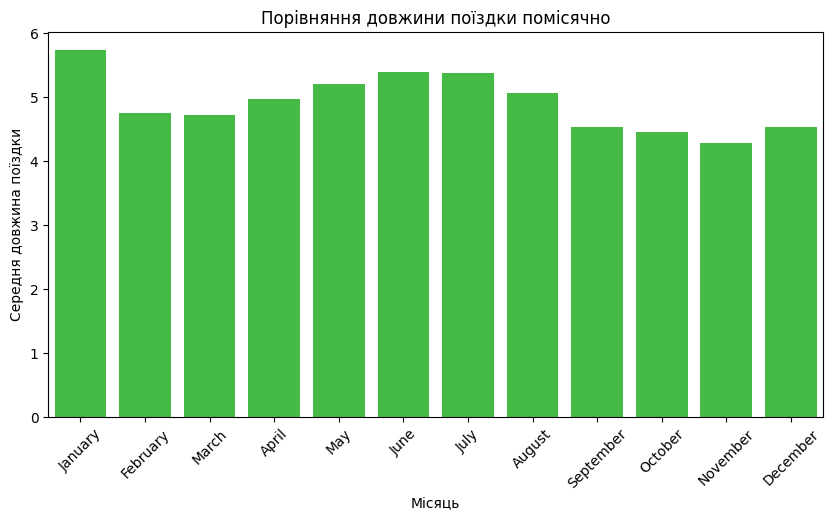

In [79]:
# Налаштування розміру графіка
plt.figure(figsize=(10, 5))

# Побудова barplot
sns.barplot(data=average_miles_per_month, x='month', y='trip_miles', color='limegreen')

# Налаштування відображення
plt.xticks(rotation=45)  # Поворот підписів місяців для кращого вигляду
plt.xlabel('Місяць')
plt.ylabel('Середня довжина поїздки')
plt.title('Порівняння довжини поїздки помісячно')

# Відображення графіка
plt.show();

**Висновок: Середня довжина поїздки зростає у літні місяці, а також в грудень-січень. Можливо це пов'язано з новорічними святами? варто проаналізувати топ-місяць січен по довжині поїздок - січень, щоб зробити остаточний висновок.**

Можливо довші поїздки відбуваються січні в перші числа місяця, після Нового Року? Перевіримо це, вивівши середню довжину поїздки з днями тижня

In [80]:
# Виведемо середню довжину поїздки згідно дати.
average_miles_date = group_by_time_unit(df, 'trip_start_timestamp', 'trip_miles', 'date', 'mean')

# Переводимо колонку з датою у формат datetime.
average_miles_date['date'] = pd.to_datetime(average_miles_date['date'])

# Додаємо назву дня тижня
average_miles_date['week_day'] = average_miles_date['date'].dt.day_name()

# Фітруємо тільки за потрібний нам місяць Січень і сортуємо за спаданням.
filtered_trips_january = average_miles_date[average_miles_date['date'].dt.month_name() == 'January']
average_miles_jan_sorted = filtered_trips_january.sort_values(by='trip_miles', ascending=False)

display(average_miles_jan_sorted)

,date,trip_miles,week_day
2,2021-01-03,9.236508,Sunday
30,2021-01-31,8.160638,Sunday
1,2021-01-02,7.759459,Saturday
22,2021-01-23,7.600000,Saturday
23,2021-01-24,7.367606,Sunday
16,2021-01-17,7.101639,Sunday
9,2021-01-10,6.985185,Sunday
0,2021-01-01,6.837879,Friday
17,2021-01-18,6.704167,Monday
21,2021-01-22,6.665833,Friday


**Висновок: Можна зазначити, що найдовші поїздки були в неділю 03.01, після Нового Року. Також можна спостерігати, що найдовші поїздки в січні 2021 року припадали, в основному, на вихідні дні. Скоріше за все на вихідні припадало відвідування церкви, зустрічі з друзями і родичами.**

#**6. Проаналізуємо який відсоток поїздок менше 2 миль (короткі поїздки), від 2 до 7 миль (середні поїздки) і більше 7 миль (довгі поздки)? Чи є різниця у тарифі і заробітку на 1 милю коротких поїздках порівняно до довгих?**

In [81]:
trips_distance = df[['unique_key', 'trip_miles']]

# Створення нового датафрейму з вибраними колонками
trips_distance = df[['unique_key', 'trip_miles']].copy()

# Функція для категоризації поїздок
def categorize_trip(miles):
    if miles < 2:
        return 'Short trip'
    elif 2 <= miles < 7:
        return 'Medium trip'
    else:
        return 'Long trip'

# Застосування функції до колонки trip_miles
trips_distance['trip_category'] = df['trip_miles'].apply(categorize_trip)

# Порахуємо кількість поїздок згідно категорії
trip_distance_grouped = trips_distance.groupby('trip_category')['unique_key'].count().reset_index().rename(columns={'unique_key':'num_of_trips'})

# Додаємо колонку з відсотком від загальної кількості поїздок
trip_distance_grouped['Percent_from_total'] = (
    trip_distance_grouped['num_of_trips'] / trip_distance_grouped['num_of_trips'].sum() * 100
).round(2)
display(trip_distance_grouped)

,trip_category,num_of_trips,Percent_from_total
0,Long trip,22671,26.96
1,Medium trip,18125,21.56
2,Short trip,43290,51.48


Для наглядності зобразимо це за допомогою графіку pie chart

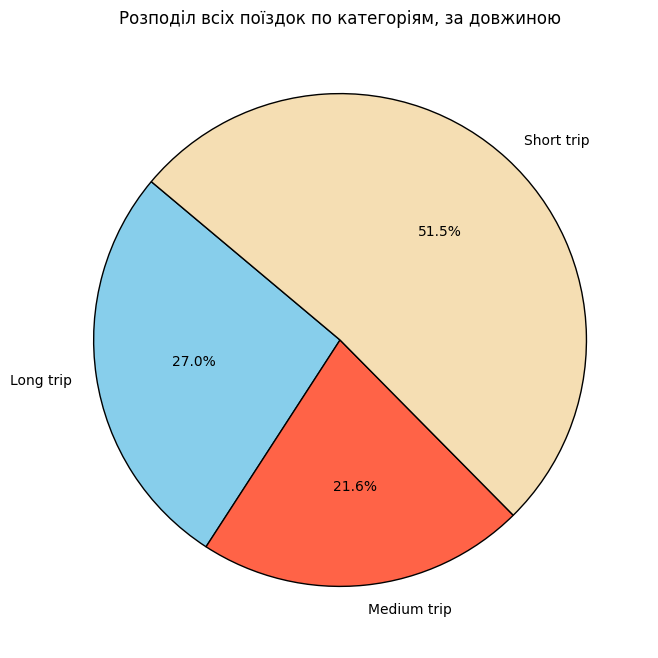

In [82]:
# Побудова pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    trip_distance_grouped['Percent_from_total'],
    labels=trip_distance_grouped['trip_category'],
    autopct='%1.1f%%',  # Відображення відсотків на діаграмі
    startangle=140,
    colors=['skyblue','tomato','wheat'],  # Задаємо кольори
    wedgeprops={'edgecolor': 'black'}  # Чорні контури для чіткості
)

plt.title('Розподіл всіх поїздок по категоріям, за довжиною')
plt.show();

Порахуємо середній тариф на 1 милі і заробіток на 1 милі.

In [83]:
# Обчислюємо вартість та дохід за милю
trips_distance['fare_per_one_mile'] = df['fare'] / df['trip_miles']
trips_distance['revenue_per_one_mile'] = df['trip_total'] / df['trip_miles']

# Обчислюємо середнє значення вартості та доходу за милю для кожної категорії поїздки
revenue_fare_mean = trips_distance.groupby('trip_category')[['fare_per_one_mile', 'revenue_per_one_mile']].mean().rename(columns={
    'fare_per_one_mile': 'mean_fare_per_mile',
    'revenue_per_one_mile': 'mean_revenue_per_mile'
})

# Стилізуємо таблицю з форматуванням та градієнтом
styled_df = revenue_fare_mean.style.format({
    'fare_per_one_mile': '{:.2f}',
    'revenue_per_one_mile': '{:.2f}'
}).background_gradient(axis=0, cmap='BuGn')

# Виводимо стилізовану таблицю
display(styled_df)


,mean_fare_per_mile,mean_revenue_per_mile
trip_category,,
Long trip,2.765164,3.130412
Medium trip,4.186315,4.821884
Short trip,22.398545,27.324825


**Висновок: Згідно отриманих даних очевидно, що середній заробіток з 1 милі найбільший серед коротких поїздок. Зважаючи також на те, що короткі поїздки складають більше половини всіх поїздок то у випадку проведення стимулювання попиту клієнтів, слід орієнтуватися на зацікавлення користування таксі саме для коротких поїздок.**

# **7. В яких районах підбору більше розповсюджена оплата готівкою?**

In [84]:
# Згрупуємо дані по кількості оплат по колонках в залежності від типу оплати
payment_counts = df.groupby(['pickup_community_area', 'payment_type'])['unique_key'].count().unstack(fill_value=0)

# Просумуємо всі інші типи оплат крім готівки
payment_counts['Other_types'] = payment_counts[['Credit Card', 'Dispute', 'No Charge', 'Unknown']].sum(axis=1)

# Порівняємо райони, де переважає оплата готівкою або іншими типами оплат
payment_counts['Cash_dominance'] = payment_counts['Cash'] > payment_counts['Other_types']

# Залишимо тільки ті районі, де переважає оплата готівкою
cash_dominant_areas = payment_counts[payment_counts['Cash_dominance']].copy()

# Вісортуємо топ5 за спаданням і виведемо на екран
top_5_cash_dominant_areas = cash_dominant_areas.sort_values(by='Cash', ascending=False).head(5)
display(top_5_cash_dominant_areas['Cash'])


,Cash
pickup_community_area,
32,8361
6,744
77,601
3,587
14,91


**Висновок: топ райони по оплаті готівкою це 32, 6, 77, 3 та 14.**

#**8 в яких локаціях платять найбільші чайові? і чи співпадають ці локації з топ-місяцем по сумі чайових?**

Виведемо топ 5 локацій по чайовим.

In [85]:
# Приберемо поїздки де не залишали чайові
df_tips_notzero = df[df['tips'] > 0]

# Згрупуємо дані по локації підбору і виведемо суму чайових
grouped_by_pickup_tips = df_tips_notzero.groupby('pickup_community_area')['tips'].sum().reset_index()

# Відсортуємо топ-5 локацій по сумі чайових і виведемо на екран
top5_tips = grouped_by_pickup_tips.sort_values(by='tips', ascending=False).head(5)
display(top5_tips)

,pickup_community_area,tips
41,76,72904.06
7,8,30700.56
23,32,23457.72
20,28,9024.00
34,56,7426.99


Визначимо топ-місяць по сумі чайових

In [86]:
# Виведемо суму чайових по кожному місяцю
grouped_tips_month_sum = group_by_time_unit(df_tips_notzero, 'trip_end_timestamp', 'tips', 'month', 'sum')

# Відсортуємо дані за спаданням і виведемо Топ місяць по сумі чайових
grouped_tips_month_sum = grouped_tips_month_sum.sort_values(by='tips', ascending=False)
top_month = grouped_tips_month_sum.iloc[0][0]
print(f"Топ місяць по сумі чайових це {top_month}")


Топ місяць по сумі чайових це October


Порівняємо топ локацій по чайовим по топ місяцю і загальні

In [87]:
#Переведемо дані з відфільтрованого датафрейму у формат datetime
df_tips_notzero['trip_end_timestamp'] = pd.to_datetime(df_tips_notzero['trip_end_timestamp'])

#Додамо стовпчик з назвою місяців
df_tips_notzero['month_name'] = df_tips_notzero['trip_end_timestamp'].dt.month_name()

#Відфільтруємо дані тільки за топ місяцем
filtered_tips_top_month = df_tips_notzero[df_tips_notzero['month_name'] == top_month]

grouped_tips_top_month = filtered_tips_top_month.groupby('pickup_community_area')['tips'].sum().reset_index()

top5_tips_top_month = grouped_tips_top_month.sort_values(by='tips', ascending=False).head(5)
display(top5_tips_top_month)

,pickup_community_area,tips
22,76,13417.11
4,8,5383.89
13,32,4223.20
14,33,1607.07
12,28,1319.48


**Висновок: Топ-5 локацій по сумі чайових це 76, 8, 32, 28 та 56, топ-5 локацій по сумі чайових в топ-місяці 76, 8, 32, 33, 28. Як бачимо перші три локації найбільші по сумі чайових як і в межах топ-місяця по чайових, так і загально.**

#**9. Чи впливає середня швидкість поїздки на розмір чайових?**

Виведемо середню швидкість і середні чайові за кожну дату

In [88]:
# Вираховуємо середню швидкість у милях на годину
df['average_speed'] = df['trip_miles'] / (df['trip_seconds'] / 3600)

# Виводимо середні чайові за кожну дату
tips_grouped_by_date = group_by_time_unit(df, 'trip_start_timestamp', 'tips', 'date', 'mean')

# Виводимо середню швидкість за кожну дату
average_speed_grouped_by_date = group_by_time_unit(df, 'trip_start_timestamp', 'average_speed', 'date', 'mean')

Зведемо обидва показники в один датафрейм для відображення на графіку

In [89]:
# Перейменуємо стовпчики для зручності подальшого об'єднання
new_columns_names = ['date', 'result']
tips_grouped_by_date.columns = new_columns_names
average_speed_grouped_by_date.columns = new_columns_names

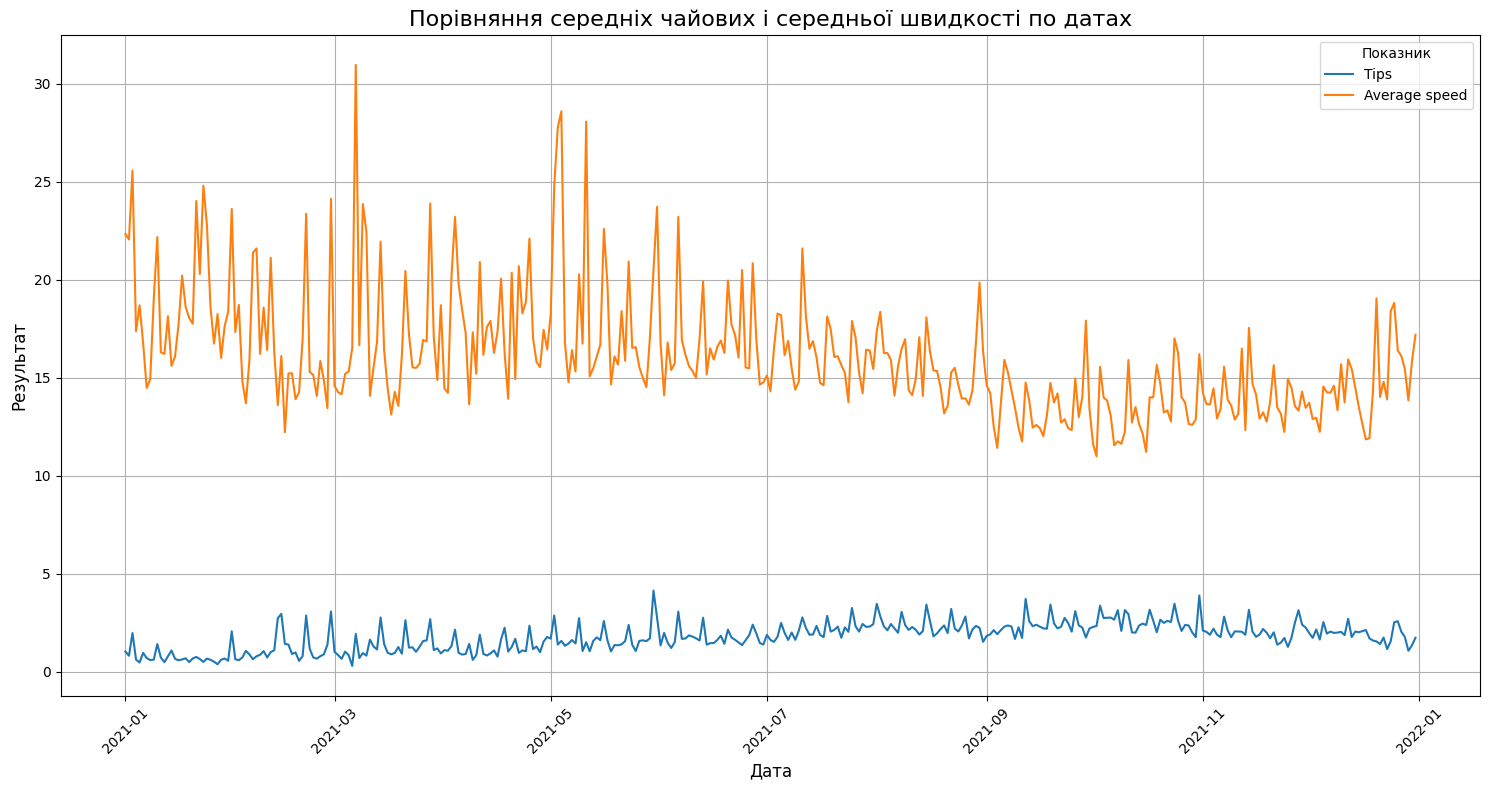

In [91]:
# Додаємо стовпчики з джерелом, для індентифікації даних при об'єднанні
tips_grouped_by_date['source'] = 'Tips'
average_speed_grouped_by_date['source'] = 'Average speed'

# Створюємо об'єднану таблицю
combined_df = pd.concat([tips_grouped_by_date, average_speed_grouped_by_date])

# Будуємо лінійний графік з двома показниками для порівняння
plt.figure(figsize=(15, 8))
sns.lineplot(data=combined_df, x='date', y='result', hue='source')

# Налаштовуємо графік
plt.title('Порівняння середніх чайових і середньої швидкості по датах', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Результат', fontsize=12)
plt.legend(title='Показник')
plt.grid(True)
plt.xticks(rotation=45)

# Відображаємо графік
plt.tight_layout()
plt.show();

**Висновок: візуальний зв'язок не спостерігається напевне, треба додаткова перевірка.**

#**10. Встановимо чи дійсно є взаємозв'язок між цими двома показниками.**

 Для початку перевіримо вибірки на нормальність. Використаємо для цього тест Шапіро-Вілка, побудуємо гістограму і QQ графік

In [92]:
# Створюємо об'єднану таблицю з двома показниками
merged_df = pd.merge(tips_grouped_by_date, average_speed_grouped_by_date, on='date')

# Прибириаємо дані про джерела
merged_df = merged_df.drop(['source_x', 'source_y'], axis=1)

# Перейменовуємо колонки
merged_df.columns = ['date', 'tips', 'average_speed']

In [93]:
# Зробимо 2 окремі вибірки для перевірки
data_tips = merged_df['tips']
data_speed = merged_df['average_speed']

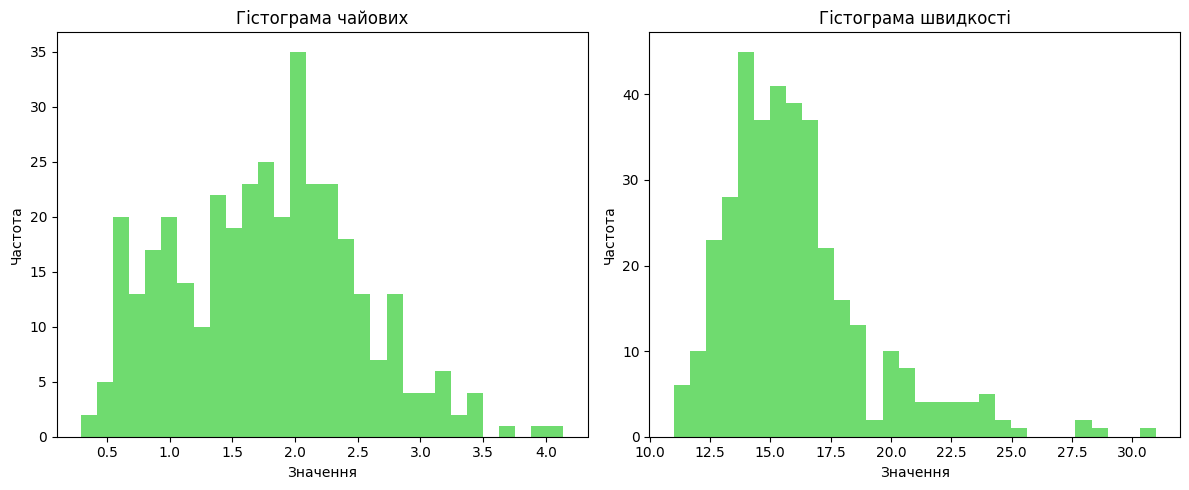

In [94]:
# Створюємо 2 місця для графіків, для розміщення на одній сторінці
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Гістограма для data_tips
axes[0].hist(data_tips, bins=30, color='limegreen', alpha=0.7)
axes[0].set_title("Гістограма чайових")
axes[0].set_xlabel("Значення")
axes[0].set_ylabel("Частота")

# Гістограма для data_speed
axes[1].hist(data_speed, bins=30, color='limegreen', alpha=0.7)
axes[1].set_title("Гістограма швидкості")
axes[1].set_xlabel("Значення")
axes[1].set_ylabel("Частота")

# Оптимізує розташування графіків
plt.tight_layout()
plt.show()

**Візуально добре спостерігається, що розподіл даних у вибірках не є нормальним.**

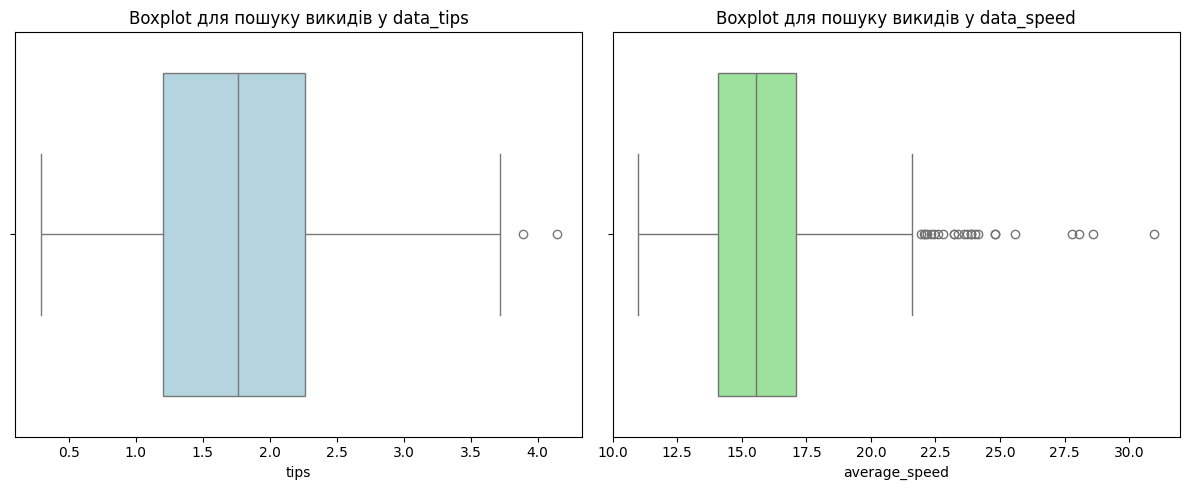

In [95]:
# Створюємо 2 місця для графіків, для розміщення на одній сторінці
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Перший boxplot для data_tips
sns.boxplot(x=data_tips, ax=axes[0], color="lightblue")
axes[0].set_title("Boxplot для пошуку викидів у data_tips")

# Другий boxplot для data_speed
sns.boxplot(x=data_speed, ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot для пошуку викидів у data_speed")

# Показуємо графік
plt.tight_layout()
plt.show();

Приберемо явно випадаючі значення і перевіримо вибірки знову

In [96]:
# Фільтруємо значення щоб залишилися лише ті, що менше заданих умов
df_filtered = merged_df[~((merged_df['tips'] > 3.5) | (merged_df['average_speed'] > 21))]

In [97]:
# Дивимося на залишок рядків
df_filtered.shape

(334, 3)

In [98]:
# Створюємо знову 2 вибірки для тестування
data_tips_norm = df_filtered['tips']
data_speed_norm =  df_filtered['average_speed']

Тепер побудуємо QQ графік для візаульної перевірки вибірки

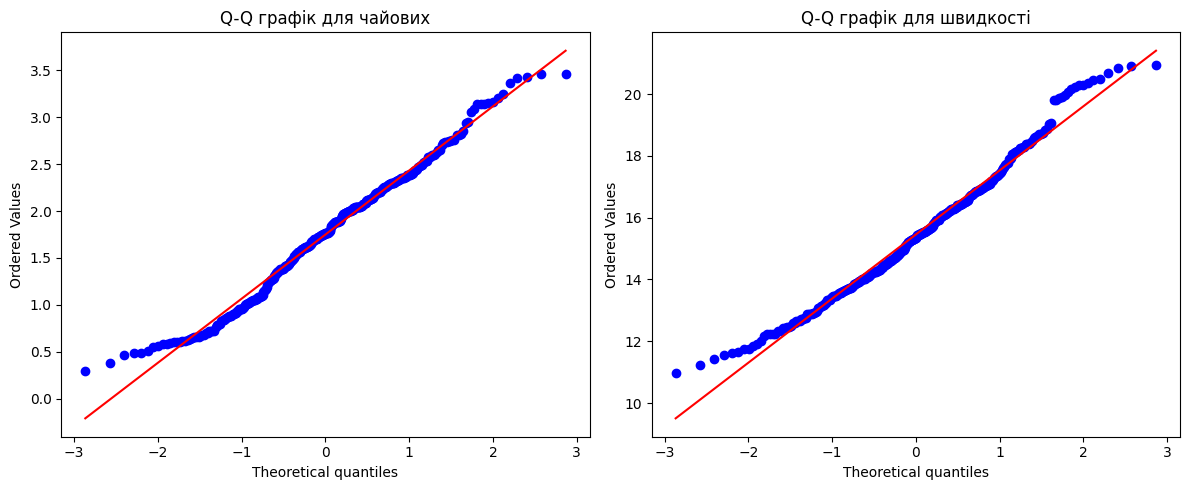

In [99]:
# Імпортуємо необхідну бібліотеку для побудови графіку
import scipy.stats as stats

# Створюємо 2 місця для графіків, для розміщення на одній сторінці
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q графік для data_tips
stats.probplot(data_tips_norm, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q графік для чайових")

# Q-Q графік для data_speed
stats.probplot(data_speed_norm, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q графік для швидкості")

plt.tight_layout()  # Оптимізує розташування графіків
plt.show();

**Візуально важко сказати точно, але як скоріше за все хоча б дані по середній швидкості не мають нормального розподілу.**

Проведемо тест Шапіро-Вілка щоб зробити остаточний висновок.
Нульова гіпотеза-дані розподілені нормально, гіпотеза H1-дані розподілені не нормально

In [100]:
# Імпортуємо необхідну бібліотеку для тесту Шапіро-Вілка
from scipy.stats import shapiro

# Виконання тесту для двох вибірок
stat_speed, p_speed = shapiro(data_speed_norm)
stat_tips, p_tips = shapiro(data_tips_norm)

# Виведення результатів
print(f"Тест Шапіро-Вілка для data_speed: Статистика тесту={stat_speed:.4f}, p-value={p_speed:.4f}")
print(f"Тест Шапіро-Вілка для data_tips: Статистика тесту={stat_tips:.4f}, p-value={p_tips:.4f}")

# Інтерпретація
alpha = 0.05
if p_speed > alpha:
    print("data_speed має нормальний розподіл (не відкидаємо H0)")
else:
    print("data_speed НЕ має нормального розподілу (відкидаємо H0)")

if p_tips > alpha:
    print("data_tips має нормальний розподіл (не відкидаємо H0)")
else:
    print("data_tips НЕ має нормального розподілу (відкидаємо H0)")


Тест Шапіро-Вілка для data_speed: Статистика тесту=0.9826, p-value=0.0005
Тест Шапіро-Вілка для data_tips: Статистика тесту=0.9856, p-value=0.0020
data_speed НЕ має нормального розподілу (відкидаємо H0)
data_tips НЕ має нормального розподілу (відкидаємо H0)


**Отже, вибірки не є нормальними.
Врахуємо це, при виявленні кореляції між цими показниками.**

Побудуємо точковий графік для візуального спостереження взаємозв'язку між середньою швидкістю і середніми чайовими

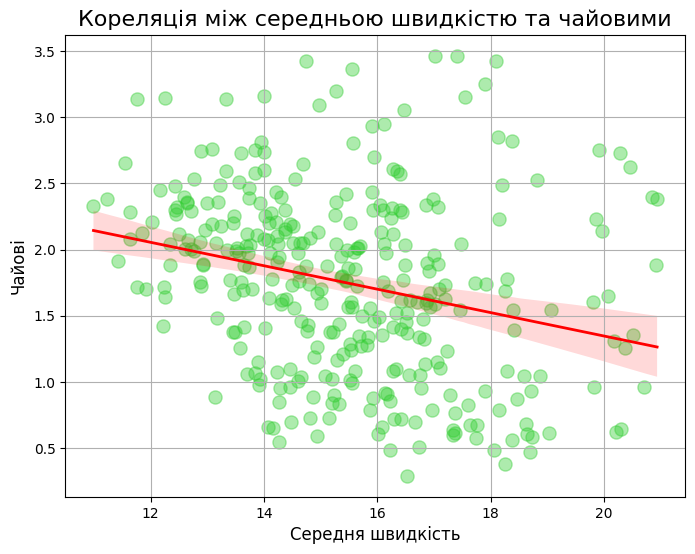

In [101]:
# Побудова точкового графіку з лінією тренду
plt.figure(figsize=(8, 6))
sns.regplot(data=df_filtered, x='average_speed', y='tips', scatter_kws={'color': 'limegreen', 'alpha': 0.4, 's': 90}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Кореляція між середньою швидкістю та чайовими', fontsize=16)
plt.xlabel('Середня швидкість', fontsize=12)
plt.ylabel('Чайові', fontsize=12)
plt.grid(True)
plt.show()

На графіку спостерігається негативна кореляція між цими двома показниками. Для перевірки порахуємо коефіцієнт кореляції Спірмана, оскільки вибірки не є нормальними.

In [102]:
# Обчислення кореляції між колонками
from scipy.stats import spearmanr
corr, p_value = spearmanr(data_tips_norm, data_speed_norm)

print(f"Кореляція між середньою швидкістю та чайовими: {corr}, p-value: {p_value}")


Кореляція між середньою швидкістю та чайовими: -0.3164557532776319, p-value: 3.329983614996437e-09


**Висновок: Значення коефіцієнта кореляції -0,316 означає що є помірний негативний зв'язок між цими двома показниками. Тобто є тенденція зменшення суми чайових при збільшенні середньої швидкості, але цей зв'язок не є дуже сильним.
При цьому p-value = 3.33e-09, це нас значно менше 0,05 отже ми можемо відкинути нульову гіпотезу про відсутність кореляції і це значить що зв'язок є статистично значущим.
Виходячи з отриманих даних можна припустити, що пасажири обирають комфортні і спокійні поїздки на противагу більш швидким. І сплачують більше чайових при нешвидких поїздках.**